In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

project_home = '/data/perlman/moochie/user_data/CamachoCat/combinedDWI'
out_dir = project_home + '/network_analysis/ENET_results_10f/'

sxs = ['CBCL_internT','CBCL_externT'] # from preregistration

#combine data into one dataframe called full_data
sample_data = pd.read_csv(out_dir + 'full_sample_connectivity.csv', index_col=None)
stress_data = pd.read_csv(out_dir + 'labeling_results.csv',index_col=0)
sxs_data = pd.read_csv('/data/perlman/moochie/user_data/ChinJenna/StressNeurodev/scored_data/cbcl_tscores.csv')
full_data = sample_data.merge(stress_data,on='ID')
full_data = full_data.merge(sxs_data, on='ID')
    
full_data.describe()

,ID,Auditory_Auditory,Auditory_CinguloOpercular,Auditory_Default,Auditory_DorsalAttention,Auditory_FrontoParietal,Auditory_Language,Auditory_Visual1,Auditory_Visual2,Auditory_somatomotor,...,LEQ_proxwtot_neg_prek35,LEQ_proxwtot_neg_school68,LEQ_tot_neg_yj,LEQ_tot_neg_res_yj,LEQ_tot_neg_predicted,LEQ_wprox_tot_neg_yj,LEQ_wprox_tot_neg_res_yj,LEQ_wprox_tot_neg_predicted,CBCL_internT,CBCL_externT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000
mean,224.645833,8.220513,7.325659,8.194351,8.550679,7.368254,7.519484,9.023575,7.978654,7.649884,...,2.729167,2.656250,3.700743e-17,2.775558e-17,1.850372e-17,2.405483e-16,2.775558e-17,8.557969e-16,48.062500,49.354167
std,360.452960,1.132593,0.703435,0.896402,0.914280,0.872355,0.795033,0.942532,0.746513,0.705016,...,3.804372,3.777574,1.005249e+00,1.000783e+00,3.097664e-33,1.005249e+00,1.003135e+00,3.060771e-01,9.595846,9.209811
min,2.000000,5.436383,5.143135,6.144766,6.117032,5.324884,5.690358,6.500386,5.671331,5.633889,...,0.000000,0.000000,-1.485655e+00,-1.637652e+00,1.850372e-17,-1.477688e+00,-1.600972e+00,-6.822977e-01,33.000000,28.000000
25%,38.750000,7.563437,6.913812,7.712656,8.012245,6.841752,6.909596,8.433787,7.628187,7.272890,...,0.000000,0.000000,-5.908840e-01,-6.645839e-01,1.850372e-17,-5.850133e-01,-6.017105e-01,-2.052224e-01,41.000000,44.000000
50%,72.500000,8.251454,7.300184,8.144120,8.525770,7.399040,7.459726,8.997798,7.897162,7.660148,...,2.000000,0.500000,-5.435510e-02,2.501443e-03,1.850372e-17,8.755754e-02,5.709590e-02,3.926354e-02,48.000000,48.500000
75%,119.250000,8.847605,7.754974,8.759597,9.146448,7.983267,8.020089,9.540287,8.478790,8.022840,...,4.000000,5.000000,6.982601e-01,7.537610e-01,1.850372e-17,7.569212e-01,7.213796e-01,1.951335e-01,54.000000,54.500000
max,1053.000000,11.899292,9.392036,10.832149,10.741196,9.793814,9.608704,12.401631,10.547059,9.714170,...,17.000000,17.000000,2.267641e+00,2.361327e+00,1.850372e-17,1.960987e+00,2.024609e+00,6.275093e-01,67.000000,77.000000


In [3]:
weights = pd.read_csv(out_dir + 'weights_df_LEQ_wprox_tot_neg_20210518.csv')
weights = weights.abs()
top_nets = []
i=1
a=0
while i==1:
    if (weights.max(axis=1)>0).any():
        top_nets.append(weights.idxmax(axis=1).to_list()[0]) #identify the highest weight
        weights = weights.drop(weights.idxmax(axis=1),axis=1)
        a=a+1
    else:
        i=0

## Associations between stress, network connectivity, and internalizing symptomology
This cell plots distributions of and runs pair-wise correlations between each variable of interest.

/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/seaborn/axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


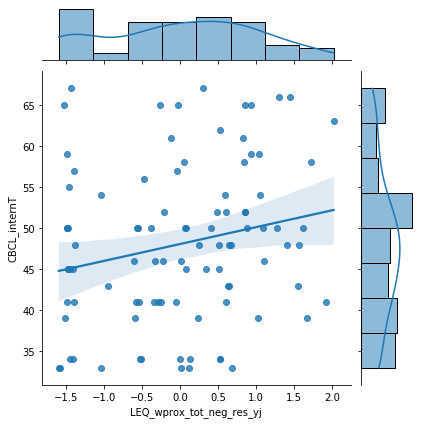

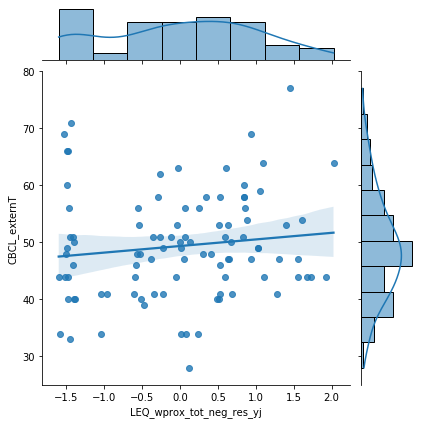

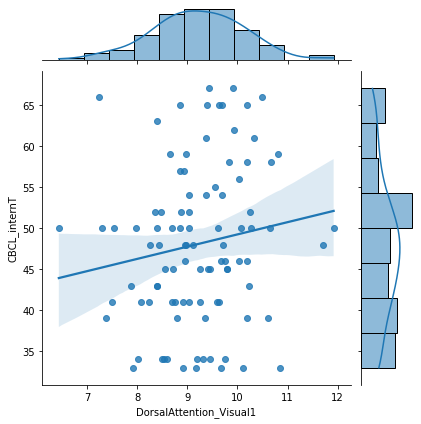

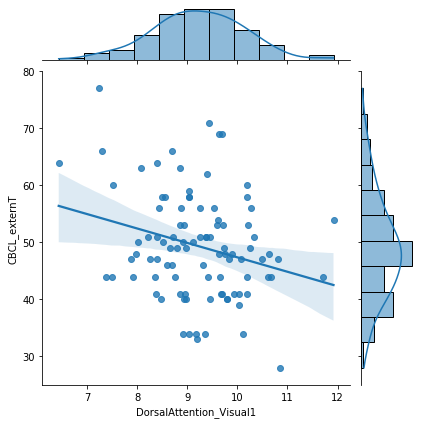

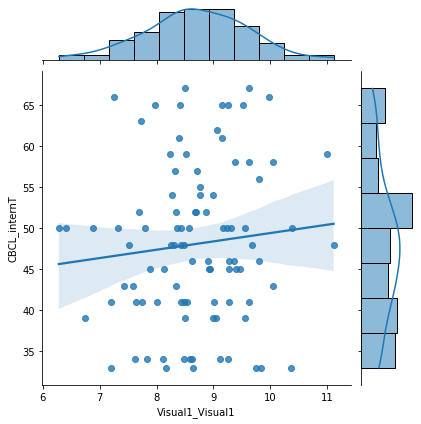

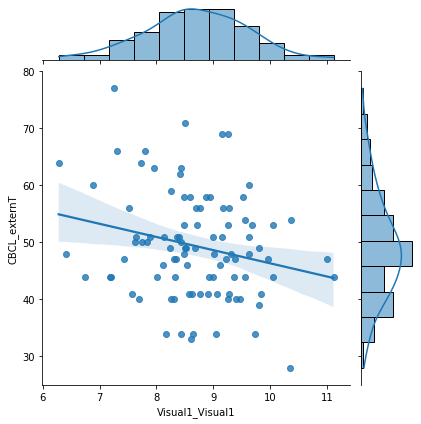

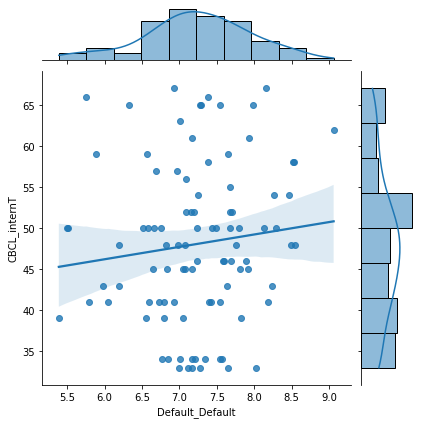

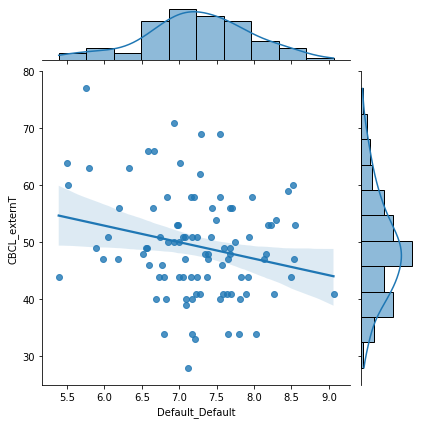

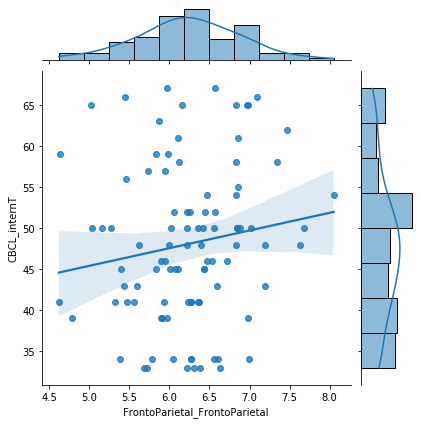

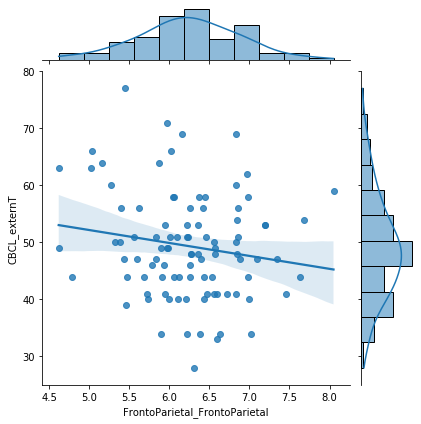

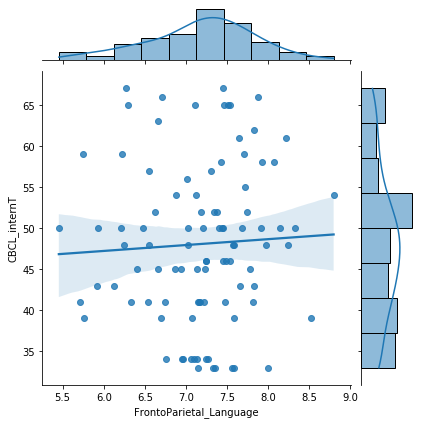

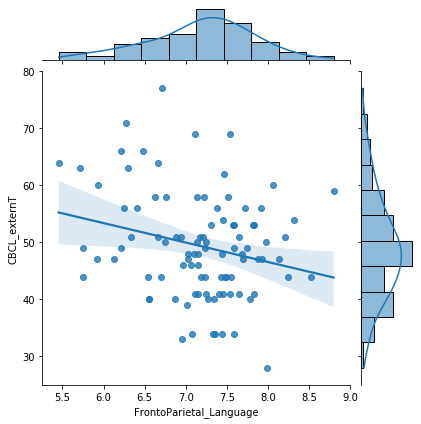

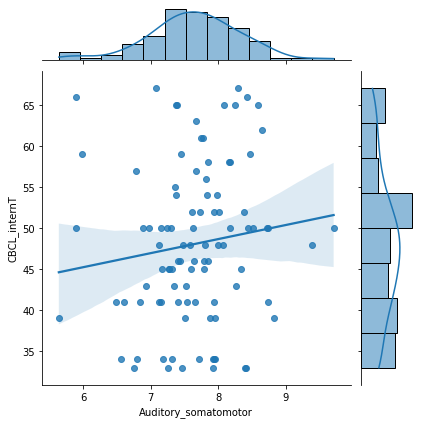

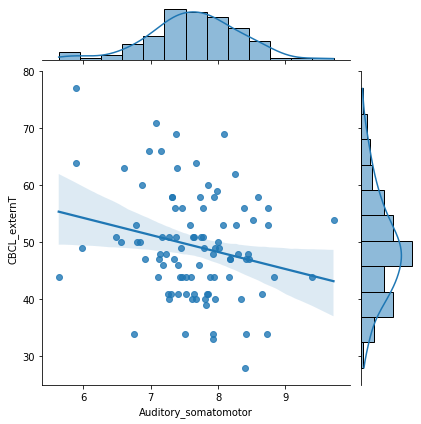

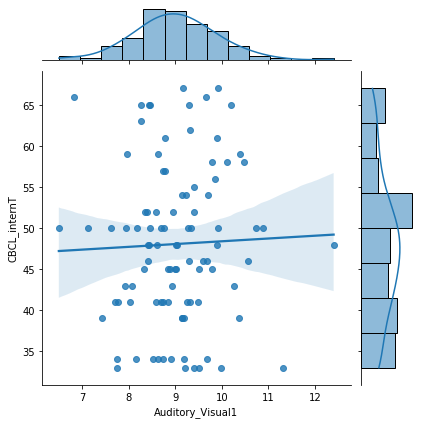

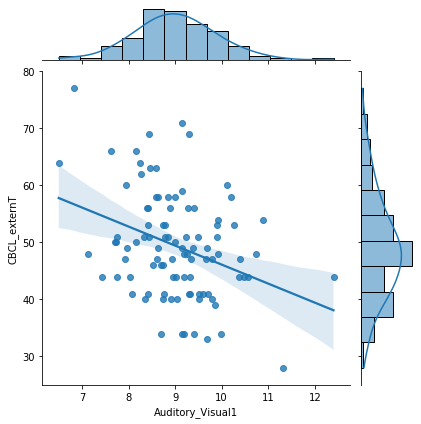

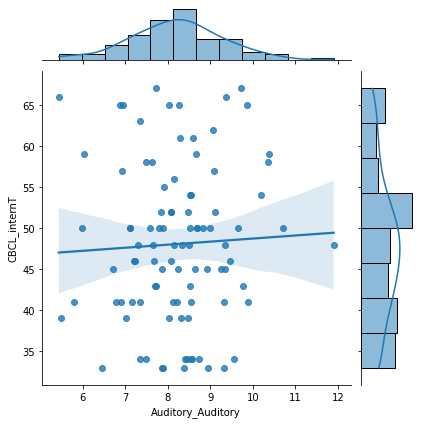

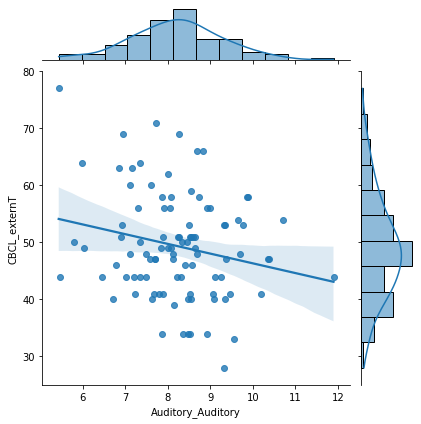

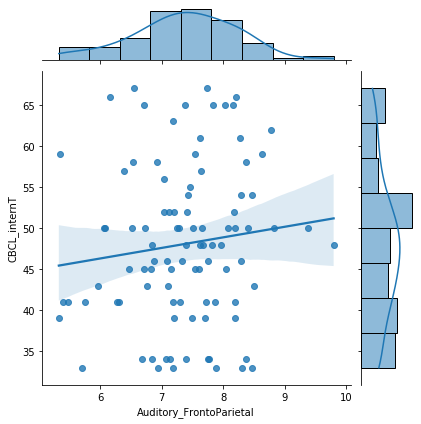

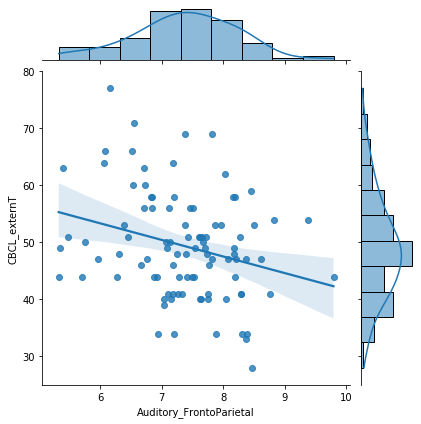

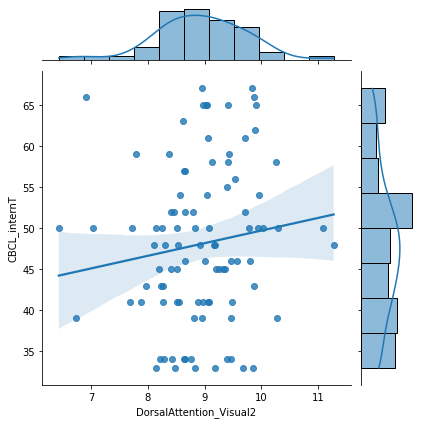

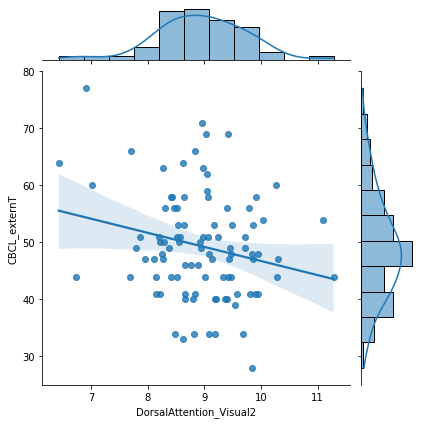

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='LEQ_wprox_tot_neg_res_yj', y='CBCL_internT', data=full_data,kind='reg')
sns.jointplot(x='LEQ_wprox_tot_neg_res_yj', y='CBCL_externT', data=full_data,kind='reg')

for a in top_nets:
    sns.jointplot(x=a, y='CBCL_internT', data=full_data,kind='reg')
    sns.jointplot(x=a, y='CBCL_externT', data=full_data,kind='reg')

In [8]:
from scipy.stats import spearmanr

sxs = ['CBCL_internT','CBCL_externT']
for s in sxs:
    x_vars = ['scan_age','LEQ_wprox_tot_neg_yj'] + top_nets
    for x in x_vars:
        spear_r, spear_p = spearmanr(full_data[s], full_data[x])
        if spear_p <0.05:
            flag = '*'
        else:
            flag=''
        print('Spearman corr between {0} and {1} r={2}, p={3}{4}'.format(s,x,round(spear_r,2),round(spear_p,3),flag))

Spearman corr between CBCL_internT and scan_age r=-0.06, p=0.58
Spearman corr between CBCL_internT and LEQ_wprox_tot_neg_yj r=0.23, p=0.025*
Spearman corr between CBCL_internT and DorsalAttention_Visual1 r=0.17, p=0.093
Spearman corr between CBCL_internT and Visual1_Visual1 r=0.08, p=0.418
Spearman corr between CBCL_internT and Default_Default r=0.14, p=0.183
Spearman corr between CBCL_internT and FrontoParietal_FrontoParietal r=0.17, p=0.1
Spearman corr between CBCL_internT and FrontoParietal_Language r=0.1, p=0.357
Spearman corr between CBCL_internT and Auditory_somatomotor r=0.18, p=0.084
Spearman corr between CBCL_internT and Auditory_Visual1 r=0.06, p=0.547
Spearman corr between CBCL_internT and Auditory_Auditory r=0.06, p=0.556
Spearman corr between CBCL_internT and Auditory_FrontoParietal r=0.12, p=0.256
Spearman corr between CBCL_internT and DorsalAttention_Visual2 r=0.17, p=0.092
Spearman corr between CBCL_externT and scan_age r=-0.01, p=0.896
Spearman corr between CBCL_extern

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

for net in top_nets:
    print('****************************************************************')
    print('************************* {0} ***********************'.format(net))
    print('****************************************************************')
    
    model = smf.glm('CBCL_internT ~ LEQ_wprox_tot_neg_yj + {0}'.format(net),data=full_data)
    model= model.fit()
    print(model.summary())
    
    model = smf.glm('CBCL_internT ~ LEQ_wprox_tot_neg_yj + {0} + LEQ_wprox_tot_neg_yj*{0}'.format(net),data=full_data)
    model= model.fit()
    print(model.summary())
    print('\n\n')

****************************************************************
************************* DorsalAttention_Visual1 ***********************
****************************************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:           CBCL_internT   No. Observations:                   96
Model:                            GLM   Df Residuals:                       93
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          88.396
Method:                          IRLS   Log-Likelihood:                -349.82
Date:                Tue, 18 May 2021   Deviance:                       8220.8
Time:                        15:52:05   Pearson chi2:                 8.22e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
      